![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 可视化初探
- 项目三预览

- ` 讲师个人主页：` www.zhang-ran.com

>- 开始录屏

`关于删除特定行`

In [1]:
import pandas as pd
df = pd.DataFrame()
df['age'] = [-1, 1, 2, 3]
df

,age
0,-1
1,1
2,2
3,3


In [2]:
df.index.tolist()

[0, 1, 2, 3]

In [3]:
num = df[df['age']==-1].index.tolist()
num

[0]

In [4]:
df = df.drop(num)
df

,age
1,1
2,2
3,3


`NumPy 向量运算`

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/NumPy%E5%90%91%E9%87%8F%E8%BF%90%E7%AE%97.png)

In [63]:
import numpy as np

In [64]:
x = np.array([1, 2, 3])
x += 5
x

array([6, 7, 8])

In [65]:
arr = np.array([1, 2, 3, 5, 8])

In [66]:
a = arr[0]
a

1

In [67]:
arr_slice = arr[2:]
arr_slice

array([3, 5, 8])

In [68]:
# 布尔值索引

names = np.array(['Bob','Joe'])
scores = np.array([64,85])

In [69]:
names == 'Bob'

array([ True, False])

In [70]:
scores[names == 'Bob']

array([64])

`可视化拓展`

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- `Alt/Option + Tab 或者 Shift + Tab 查询属性`

In [72]:
# pd.to_datetime

In [73]:
df = pd.read_csv('pro_df.csv')
df.head(1)

,Trip_Duration,Birth_Year,hour,month,day,User_Type,Gender
0,321,1992,15,6,5,Subscriber,Male


In [74]:
df.User_Type = df.User_Type.astype('category')
df.Gender = df.Gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238948 entries, 0 to 238947
Data columns (total 7 columns):
Trip_Duration    238948 non-null int64
Birth_Year       238948 non-null int64
hour             238948 non-null int64
month            238948 non-null int64
day              238948 non-null int64
User_Type        238948 non-null category
Gender           238948 non-null category
dtypes: category(2), int64(5)
memory usage: 9.6 MB


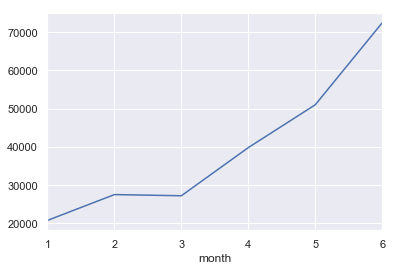

In [75]:
# 每月的数量变化

df.groupby('month')['month'].count().plot(kind = 'line');

In [76]:
# 输出男女每月的人数

groupby = df.groupby(['Gender','month'])['Gender','month'].count()
groupby.Gender

Gender  month
Female  1         4059
        2         6119
        3         5737
        4         9585
        5        12750
        6        19508
Male    1        16745
        2        21437
        3        21514
        4        30250
        5        38284
        6        52960
Name: Gender, dtype: int64

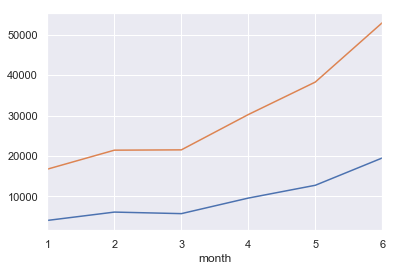

In [77]:
# 选择数据进行线条绘制

groupby.Gender.Female.plot(kind = 'line')
groupby.Gender.Male.plot(kind = 'line')

plt.show();

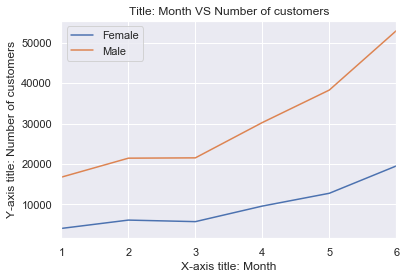

In [78]:
# 练习增加 X轴 Y轴 标题 和 标签
line_f = groupby.Gender.Female.plot(kind = 'line')
line_m = groupby.Gender.Male.plot(kind = 'line')

# X轴
plt.xlabel('X-axis title: Month')

# Y轴
plt.ylabel('Y-axis title: Number of customers')

# Title
plt.title('Title: Month VS Number of customers')

# 标签
plt.legend(labels = ['Female', 'Male'], loc = 0)
plt.show();

In [79]:
# 求出两个月之间的差值

diff = groupby.Gender.diff()
diff

Gender  month
Female  1            NaN
        2         2060.0
        3         -382.0
        4         3848.0
        5         3165.0
        6         6758.0
Male    1        -2763.0
        2         4692.0
        3           77.0
        4         8736.0
        5         8034.0
        6        14676.0
Name: Gender, dtype: float64

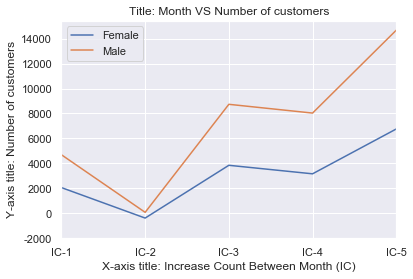

In [80]:
# 练习增加 X轴 Y轴 标题 和 标签
line_f = diff.Female[1:].plot(kind = 'line')
line_m = diff.Male[1:].plot(kind = 'line')

# X轴
plt.xlabel('X-axis title: Increase Count Between Month (IC)',
           fontdict = {'fontsize': 12})

# Y轴
plt.ylabel('Y-axis title: Number of customers',
           fontdict = {'fontsize': 12})

# Title
plt.title('Title: Month VS Number of customers')

# 标签
plt.legend(labels = ['Female', 'Male'], loc = 0)

# 改变 x 和 y的间隔
plt.xticks(range(2,7), 
           ["IC-{}".format(i) for i in range(1,6)])

plt.yticks(range(-2000, 16000, 2000))

# 增加网格
plt.grid(b = True, axis = 'y')

plt.show();

In [81]:
# 求出每个group的平均骑行时间

groupby2 = df[['User_Type','Trip_Duration']].groupby('User_Type')['Trip_Duration'].mean()
groupby2

User_Type
Customer      807.637363
Dependent     311.000000
Subscriber    699.351195
Name: Trip_Duration, dtype: float64

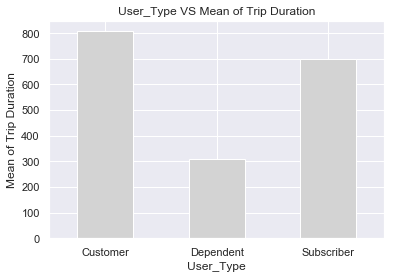

In [82]:
# 输出用户类型的平均骑行时间的bar图

groupby2.plot(kind = 'bar',
              color = 'lightgrey')

plt.xticks(rotation = 0)
plt.ylabel('Mean of Trip Duration')
plt.title("User_Type VS Mean of Trip Duration")

plt.grid(b = True, axis = 'y')
plt.show();

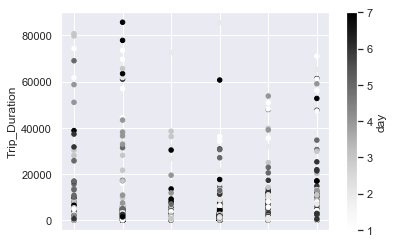

In [83]:
# 输出散点图

df.plot.scatter(x = 'month',
                y = 'Trip_Duration',
                c = 'day')
plt.show();

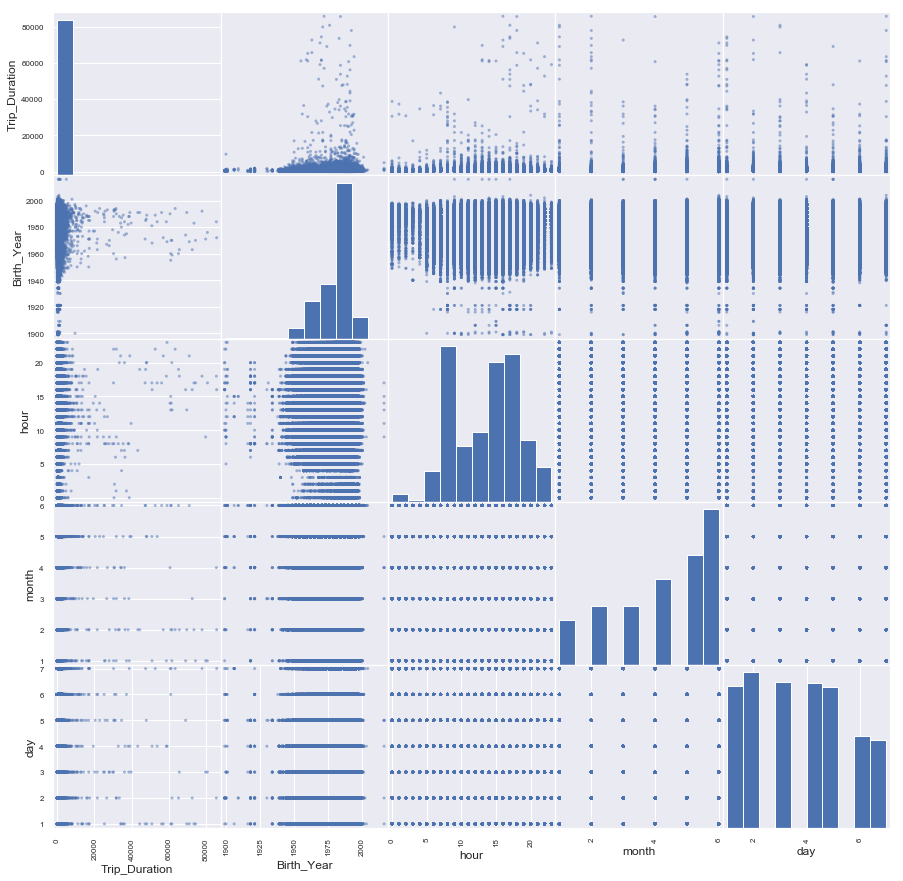

In [85]:
# plotting a metrix of several columns

pd.plotting.scatter_matrix(df, figsize = (15,15))
plt.show();

In [ ]:
# 设定灰色背景

sns.set(style="darkgrid")

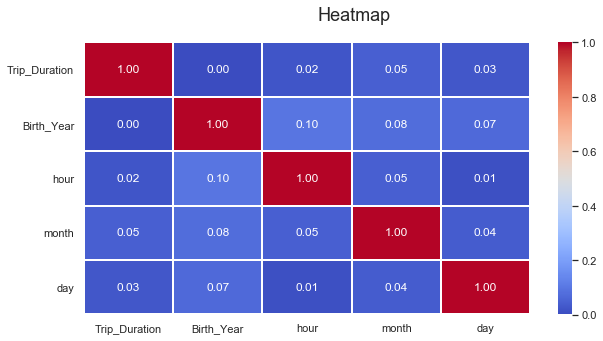

In [ ]:
# 输出数据集热点图

fig, ax = plt.subplots(figsize=(10, 5)) 
corr = df.iloc[:,:5].corr()
heatmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=1) 
fig.suptitle('Heatmap', fontsize=18)
plt.show();

In [ ]:
# 输出年龄和骑行时间的关系

sns.relplot(x = 'Birth_Year', y = 'Trip_Duration', data = df,
            
            # figsize, width = aspect * height
            height = 4,
            aspect = 1.7,
            col_wrap = 1,
            
            # change color
            col = 'Gender',
            hue = 'month',
            palette="ch:r=-.5,l=.75")

plt.show();

`项目预览`

In [ ]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

>- [此数据集中变量的意义](http://www.capallen.top/dand-vip/2018/09/05/%E7%AC%AC%E5%85%AB%E5%91%A8-TMDB%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90/)

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

In [ ]:
# AttributeError: 'float' object has no attribute 'split'


'''
genres_set = set()

for x in df1['genres']: 
    
    genres_set.update(x.split('|')) 
    
genres_set

'''

print('AttributeError: float object has no attribute split')

In [ ]:
df.genres = df.genres.astype(str)

genres_set = set()
for x in df['genres']: 
    genres_set.update(x.split('|')) 
    
genres_set

In [ ]:
genres_set.remove('nan')

In [ ]:
genres_set

>- [pd.str.contains文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

In [ ]:
for genres in genres_set:
    df[genres] = df['genres'].str.contains(genres)
df.head(1)

In [ ]:
for genres in genres_set:
    df[genres] = df['genres'].str.contains(genres).apply(lambda x:1 if x else 0)
df.head(1) 

In [ ]:
df.drop('genres', axis = 1, inplace = True)

In [ ]:
nums = df.groupby('release_year')['release_year'].count() 
year = df['release_year']
nums.plot(x = year, y =nums)
plt.show();

In [ ]:
nums = df.groupby('release_year')['release_year'].count() 
year = df['release_year']

fig = plt.figure(figsize=(10,5)) 
nums.plot(x = year, y =nums)

plt.title('?', fontsize = 18)
plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18)  
plt.xticks(range(1960, 2018, 10))
plt.show();

In [ ]:
df['vote_average'].plot(kind = 'hist',bins = 50,title = '?',figsize = (10,5))
plt.ylabel('?')
plt.xlabel('?')
plt.show();

In [ ]:
df_war = df[df['War'] == 1]
df_war_popularity = df_war[df_war.popularity > df_war.popularity.quantile(.98)]

x = df_war_popularity.original_title
y = df_war_popularity['popularity']

plt.barh(x, y)

plt.title('?', fontsize = 18)
plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18) 

plt.show();

In [ ]:
df_war_popularity = df_war_popularity.sort_values(by = 'popularity')

x = df_war_popularity.original_title
y = df_war_popularity['popularity']

plt.barh(x, y)

plt.title('?', fontsize = 18)
plt.ylabel('?', fontsize =18) 
plt.xlabel('?', fontsize =18)

plt.show();